# Objective

The objective of this project is to gain hands-on experience using Python (one of the most popular tools for data mining and machine learning) to build models from real world datasets. You will also evaluate different data mining algorithms in terms of accuracy and run time. 


[Dataset: News Popularity](https://github.com/tofighi/ITM760/blob/main/dataset/online_news_popularity.csv?raw=true)


# Description
Your job is to first apply exploratory analysis on this dataset. Split this dataset into a training set (70%) and a test set (30%) (Hint: take a look at parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).The other parameters rather than `test_size` can be similar to the labs.

Then, apply each of the following algorithms to learn a model from the training set and classify the examples in the test set. 
 

*   SVM
*   k-Nearest Neighbor
*   Decision Tree 


The above algorithms must be performed on the following dataset. 

Use all 58 predictive attributes of the dataset for classification.

Report the classification accuracy and run time for training the model (`fit` function, such as `clf.fit(X_train,y_train)`) when you run the code (you can use [this code](https://stackoverflow.com/a/16414144)) for runtime of each algorithm on each data set. An example of runtime for a for loop is given [here](https://colab.research.google.com/drive/1aQ-iCWSeyA-pn2pH6CjaqsWuGEpqKCOt?usp=sharing).

Discuss the results and determine if there is an overall winner in terms of accuracy (misclassification rates) and run time. Apply relevant data cleaning (dropping non-predictive columns) and data transformation (scaling attributes) techniques (similar to labs).


# Dataset : Online News Popularity
The dataset is downloaded to your environment using the following code. 

This dataset summarizes a set of features about articles published by Mashable in a period of two years. The goal is to predict `the number of shares` in social networks (popularity). 

## Attribute Information:
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 target class) 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (`target class`)


In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/tofighi/ITM760/blob/main/dataset/news_popularity.csv?raw=true")
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Task 1

Report the size of dataset (number of columns and rows), clean it (drop non-predictive columns), and create scatter matrix (similar to labs) for an optional subset (for example choose 10 numerical attributes) of numerical attributes.

(39644, 61)


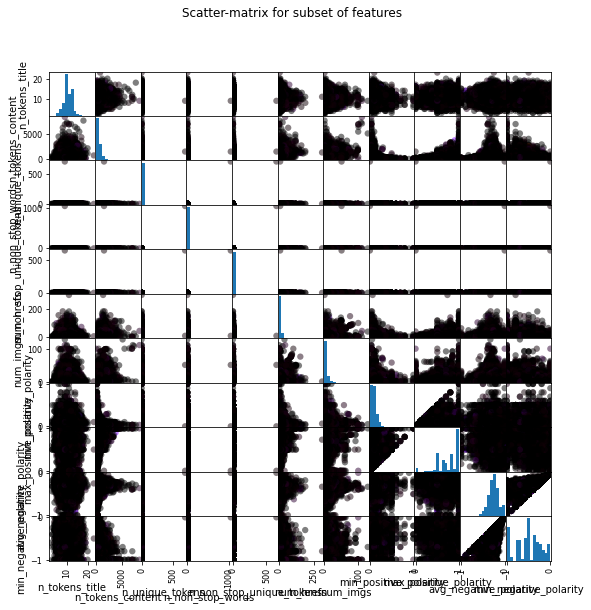

In [3]:
#Your code here
#Your code here
#report the size of the dataset 
import pandas as pd
df = pd.read_csv("https://github.com/tofighi/ITM760/blob/main/dataset/news_popularity.csv?raw=true")
df.head(5)

#number of columns and rows
print(df.shape)

#drop non predictive columns 
df.drop(['url', 'timedelta'], axis=1)



#scatter matrix/correlation analysis
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['n_tokens_title', 'n_tokens_content','n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs','num_imgs', 'min_positive_polarity', 'max_positive_polarity','avg_negative_polarity', 'min_negative_polarity']
X = df[feature_names]
y = df['shares']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for subset of features')
plt.savefig('shares_scatter_matrix')


## Task 2

Split the dataset into a training set (70%) and a test set (30%) and apply scaling, etc (similar to lab)

In [4]:
#split dataset into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Task 3

Train k-NN for k=3,5,7,9,11 and calculate runtime and accuracy for each *k*. (You can repeat code multiple times for different *k*, by setting `n_neighbors` in code as described [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

In [5]:
#Your code here

#set k = 3 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# set k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# set k = 7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# set k = 9
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# set k = 11
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.33
Accuracy of K-NN classifier on test set: 0.02
Accuracy of K-NN classifier on training set: 0.22
Accuracy of K-NN classifier on test set: 0.01
Accuracy of K-NN classifier on training set: 0.18
Accuracy of K-NN classifier on test set: 0.01
Accuracy of K-NN classifier on training set: 0.16
Accuracy of K-NN classifier on test set: 0.02
Accuracy of K-NN classifier on training set: 0.15
Accuracy of K-NN classifier on test set: 0.03


## Task 4
Train SVM similar to the lab document and calculate runtime and accuracy

In [6]:
#Your code here
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.06
Accuracy of SVM classifier on test set: 0.06


## Task 5

Train Decision Tree similar to the lab document and calculate runtime and accuracy

In [7]:
#Your code here

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))







Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.02


## Task 6 - Complete the summary

Complete this cell (if there is a tie in results, report all of them):

**Hint**: The low accuracy/performance is NOT important in this project. Just make sure you follow right steps, and report based on what you found


* The best performance (train and test accuracy) for k-NN was for k=?
* Among k-nn, SVM and Decision Tree: 
* The shortest runtime is:
* The longest runtime is:
* Overall, the best performance model based on `train accuracy` is:
* Overall, the best performance model based on `test accuracy` is:

In [ ]:
# highest performance for k-NN was k = 3 because it had the highest test and train accuracy

# Among k-nn, SVM and Decision Tree:
#shortest run time is: 
#longest runtime is: 

#overall the best performance model based on TRAIN accuracy is : the decision tree

#overall the best perfromance model based on TEST accuracy is: SVM classifier

